## Import Packages

In [48]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import pandas as pd
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
import scipy.stats as stats
import os
import ttest
import Smooth_Data
#import seaborn as sns
#sns.set_context("talk")
import Area_Avg
import cyclic_lon
from netCDF4 import Dataset
from netCDF4 import MFDataset
from ncdump_python3 import ncdump
from mpl_toolkits.basemap import Basemap
%matplotlib inline
mpl.rc('font',size=27) #set default font size and weight for plots

## Read in Data as Nested Dictionaries

In [2]:
Months = ['01','02','03','04','05','06','07','08','09','10','11','12']
Sims = ['Sim1','Sim2','Sim3']

In [3]:
Years = range(2005,2066)
Years = list(map(str, Years))

Years_fixODS = range(2001,2066)
Years_fixODS = list(map(str, Years_fixODS))

Years_wAVD = range(2005,2066)
Years_wAVD = list(map(str, Years_wAVD))

In [4]:
#establish initial root directory and modify it to be a list of strings,
    #not integers

rootdir = 'Data/'

dirnames = os.listdir(rootdir)
dirnames = list(map(str, dirnames))
dirnames

['.DS_Store',
 'Port',
 'b.e10.BRCP45WCN.f19_g16.waLMP.001',
 'b.e10.BRCP45WCN.f19_g16.waLMP.002',
 'b.e10.BRCP45WCN.f19_g16.waLMP.003',
 'b40.1955-2005.2deg.wcm.002',
 'b40.rcp4_5.2deg.wcm.001',
 'b40.rcp4_5.2deg.wcm.002',
 'b40.rcp4_5.2deg.wcm.003',
 'b40.rcp4_5.2deg.wcm.fixODS2000.001',
 'b40.rcp4_5.2deg.wcm.fixODS2000.002',
 'b40.rcp4_5.2deg.wcm.fixODS2000.003']

In [5]:
#establish full directories for each run

#WACCM4 2Deg Warming RCP 45 Run1
datadir_RCP45_Sim1 = rootdir + dirnames[6] +'/atm'+'/interp/'
#WACCM4 2Deg Warming RCP 45 Run2
datadir_RCP45_Sim2 = rootdir + dirnames[7] +'/atm'+'/interp/'   
#WACCM4 2Deg Warming RCP 45 Run3
datadir_RCP45_Sim3 = rootdir + dirnames[8] +'/atm'+'/interp/'
#WACCM4 2Deg Warming fixODS RCP 45 Run1
datadir_fixODS_Sim1 = rootdir + dirnames[9] +'/atm'+'/interp/'    
#WACCM4 2Deg Warming fixODS RCP 45 Run2
datadir_fixODS_Sim2 = rootdir + dirnames[10] +'/atm'+'/interp/'
#WACCM4 2Deg Warming fixODS RCP 45 Run3
datadir_fixODS_Sim3 = rootdir + dirnames[11] +'/atm'+'/interp/'
#WACCM4 2Deg Warming waLMP RCP 45 Run1
datadir_waAVD_Sim1 = rootdir + dirnames[2] +'/atm'+'/interp/'
#WACCM4 2Deg Warming waLMP RCP 45 Run2
datadir_waAVD_Sim2 = rootdir + dirnames[3] +'/atm'+'/interp/'
#WACCM4 2Deg Warming waLMP RCP 45 Run3
datadir_waAVD_Sim3 = rootdir + dirnames[4] +'/atm'+'/interp/'

In [6]:
Datadir_RCP45 = [datadir_RCP45_Sim1,\
               datadir_RCP45_Sim2,\
               datadir_RCP45_Sim3]
Datadir_fixODS2000 = [datadir_fixODS_Sim1,\
               datadir_fixODS_Sim2,\
               datadir_fixODS_Sim3]
Datadir_wAVD = [datadir_waAVD_Sim1,\
               datadir_waAVD_Sim2,\
               datadir_waAVD_Sim3]

In [7]:
#Read in all WACCM Temperature Data

RCP45 = dict()
for s in range(len(Sims)):
    RCP45[Sims[s]] = dict()
    for m in range(len(Months)):
        RCP45[Sims[s]][Months[m]] = dict()
        for y in range(len(Years)):
            try:
                files_RCP45 = Datadir_RCP45[s]+'T.'+Years[y]+\
                '.'+Months[m]+'.Arctic.nc'
                RCP45_nc = Dataset(files_RCP45)
                RCP45[Sims[s]][Months[m]][Years[y]] = \
                np.squeeze(RCP45_nc.variables['T'])
                RCP45_nc.close()
            except:
                pass

fixODS2000 = dict()
for s in range(len(Sims)):
    fixODS2000[Sims[s]] = dict()
    for m in range(len(Months)):
        fixODS2000[Sims[s]][Months[m]] = dict()
        for y in range(len(Years_fixODS)):
            try:
                files_fixODS2000 = Datadir_fixODS2000[s]+'T.'+Years_fixODS[y]+\
                '.'+Months[m]+'.Arctic.nc'
                fixODS2000_nc = Dataset(files_fixODS2000)
                fixODS2000[Sims[s]][Months[m]][Years_fixODS[y]] = \
                np.squeeze(fixODS2000_nc.variables['T'])
                fixODS2000_nc.close()
            except:
                pass
                
wAVD = dict()
for s in range(len(Sims)):
    wAVD[Sims[s]] = dict()
    for m in range(len(Months)):
        wAVD[Sims[s]][Months[m]] = dict()
        for y in range(len(Years_wAVD)):
            try:
                files_wAVD = Datadir_wAVD[s]+'T.'+Years_wAVD[y]+\
                '.'+Months[m]+'.Arctic.nc'
                wAVD_nc = Dataset(files_wAVD)
                wAVD[Sims[s]][Months[m]][Years_wAVD[y]] = \
                np.squeeze(wAVD_nc.variables['T'])
                wAVD_nc.close()
            except:
                pass

In [8]:
#we need to fix the fill 
    #value issue before we can do anything else to the data
        #to do this, we just mask all values that are considered fill values

for s in range(len(Sims)):
    for m in range(len(Months)):
        for y in range(len(Years)):
            try:
                RCP45[Sims[s]][Months[m]][Years[y]] = np.ma.masked_equal(\
                RCP45[Sims[s]][Months[m]][Years[y]], 9.96921e+36)
            except:
                pass

for s in range(len(Sims)):
    for m in range(len(Months)):
        for y in range(len(Years_fixODS)):
            try:
                fixODS2000[Sims[s]][Months[m]][Years_fixODS[y]] = np.ma.masked_equal(\
                fixODS2000[Sims[s]][Months[m]][Years_fixODS[y]], 9.96921e+36)
            except:
                pass
            
for s in range(len(Sims)):
    for m in range(len(Months)):
        for y in range(len(Years_wAVD)):
            try:
                wAVD[Sims[s]][Months[m]][Years_wAVD[y]] = np.ma.masked_equal(\
                wAVD[Sims[s]][Months[m]][Years_wAVD[y]], 9.96921e+36)
            except:
                pass

In [9]:
#Get other variables of interest

Get_Pressure_File = datadir_RCP45_Sim1+'T.2005.01.Arctic.nc'
Get_Pressure_nc = Dataset(Get_Pressure_File)
Pressure = np.squeeze(Get_Pressure_nc.variables['lev_p'])
Lat = np.squeeze(Get_Pressure_nc.variables['lat'])
Lon = np.squeeze(Get_Pressure_nc.variables['lon'])
Get_Pressure_nc.close()
Pressure_L = np.log10(Pressure)

In [10]:
Pressure

array([1.00e-01, 5.00e-01, 1.00e+00, 2.00e+00, 3.00e+00, 5.00e+00,
       1.00e+01, 2.00e+01, 3.00e+01, 5.00e+01, 7.00e+01, 1.00e+02,
       1.50e+02, 2.00e+02, 2.50e+02, 3.00e+02, 4.00e+02, 5.00e+02,
       6.00e+02, 7.00e+02, 8.50e+02, 9.25e+02, 1.00e+03], dtype=float32)

In [11]:
Pressure_named = ['0.1','0.5','1','2','3','5','10','20','30','50','70','100','150',\
                  '','250','','400','','','700','','','1000']
len(Pressure_named)

23

In [12]:
#Turn dictionaries into Panels for grouping purposes

RCP45_Panel = pd.Panel.from_dict(RCP45, orient = 'items')
fixODS2000_Panel = pd.Panel.from_dict(fixODS2000, orient = 'items')
wAVD_Panel = pd.Panel.from_dict(wAVD, orient = 'items')

/Users/johnvirgin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  This is separate from the ipykernel package so we can avoid doing imports until
/Users/johnvirgin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  

## Calculate Decadal Averages and Differences for All Seasons and Runs

RCP45

In [13]:
#Have to do december different for DJF Remember
#DJF
RCP45_1DA_D_Avg = RCP45_Panel.loc['Sim1':'Sim3','2005':'2014','12']
RCP45_1DA_D_Avg = np.asarray(RCP45_1DA_D_Avg)
RCP45_1DA_D_Avg = np.mean(RCP45_1DA_D_Avg, axis=(0,1))

RCP45_2DA_D_Avg = RCP45_Panel.loc['Sim1':'Sim3','2055':'2064','12']
RCP45_2DA_D_Avg = np.asarray(RCP45_2DA_D_Avg)
RCP45_2DA_D_Avg = np.mean(RCP45_2DA_D_Avg, axis=(0,1))

RCP45_D_DD = RCP45_2DA_D_Avg-RCP45_1DA_D_Avg

RCP45_1DA_JF_Avg = RCP45_Panel.loc['Sim1':'Sim3','2006':'2015','01':'02']
RCP45_1DA_JF_Avg = np.asarray(RCP45_1DA_JF_Avg)
RCP45_1DA_JF_Avg = np.mean(RCP45_1DA_JF_Avg, axis=(0,1,2))

RCP45_2DA_JF_Avg = RCP45_Panel.loc['Sim1':'Sim3','2056':'2065','01':'02']
RCP45_2DA_JF_Avg = np.asarray(RCP45_2DA_JF_Avg)
RCP45_2DA_JF_Avg = np.mean(RCP45_2DA_JF_Avg, axis=(0,1,2))

RCP45_JF_DD = RCP45_2DA_JF_Avg-RCP45_1DA_JF_Avg

RCP45_DJF_DD = np.ma.mean((RCP45_D_DD,RCP45_JF_DD),axis=0)
RCP45_1DA_DJF_Avg = np.ma.mean((RCP45_1DA_D_Avg,RCP45_1DA_JF_Avg),axis=0) 
RCP45_2DA_DJF_Avg = np.ma.mean((RCP45_2DA_D_Avg,RCP45_2DA_JF_Avg),axis=0)
RCP45_2DA_DJF_Avg.shape

(23, 16, 144)

In [14]:
#MAM

RCP45_1DA_MAM_Avg = RCP45_Panel.loc['Sim1':'Sim3','2006':'2015','03':'05']
RCP45_1DA_MAM_Avg = np.asarray(RCP45_1DA_MAM_Avg)
RCP45_1DA_MAM_Avg = np.mean(RCP45_1DA_MAM_Avg, axis=(0,1,2))

RCP45_2DA_MAM_Avg = RCP45_Panel.loc['Sim1':'Sim3','2056':'2065','03':'05']
RCP45_2DA_MAM_Avg = np.asarray(RCP45_2DA_MAM_Avg)
RCP45_2DA_MAM_Avg = np.mean(RCP45_2DA_MAM_Avg, axis=(0,1,2))

RCP45_MAM_DD = RCP45_2DA_MAM_Avg-RCP45_1DA_MAM_Avg
RCP45_MAM_DD.shape

(23, 16, 144)

In [15]:
#JJA

RCP45_1DA_JJA_Avg = RCP45_Panel.loc['Sim1':'Sim3','2006':'2015','06':'08']
RCP45_1DA_JJA_Avg = np.asarray(RCP45_1DA_JJA_Avg)
RCP45_1DA_JJA_Avg = np.mean(RCP45_1DA_JJA_Avg, axis=(0,1,2))

RCP45_2DA_JJA_Avg = RCP45_Panel.loc['Sim1':'Sim3','2056':'2065','06':'08']
RCP45_2DA_JJA_Avg = np.asarray(RCP45_2DA_JJA_Avg)
RCP45_2DA_JJA_Avg = np.mean(RCP45_2DA_JJA_Avg, axis=(0,1,2))

RCP45_JJA_DD = RCP45_2DA_JJA_Avg-RCP45_1DA_JJA_Avg
RCP45_JJA_DD.shape

(23, 16, 144)

In [16]:
#SON

RCP45_1DA_SON_Avg = RCP45_Panel.loc['Sim1':'Sim3','2006':'2015','09':'11']
RCP45_1DA_SON_Avg = np.asarray(RCP45_1DA_SON_Avg)
RCP45_1DA_SON_Avg = np.mean(RCP45_1DA_SON_Avg, axis=(0,1,2))

RCP45_2DA_SON_Avg = RCP45_Panel.loc['Sim1':'Sim3','2056':'2065','09':'11']
RCP45_2DA_SON_Avg = np.asarray(RCP45_2DA_SON_Avg)
RCP45_2DA_SON_Avg = np.mean(RCP45_2DA_SON_Avg, axis=(0,1,2))

RCP45_SON_DD = RCP45_2DA_SON_Avg-RCP45_1DA_SON_Avg
RCP45_SON_DD.shape

(23, 16, 144)

fixODS2000

In [17]:
#Have to do december different for DJF Remember
#DJF
fixODS2000_1DA_D_Avg = fixODS2000_Panel.loc['Sim1':'Sim3','2005':'2014','12']
fixODS2000_1DA_D_Avg = np.asarray(fixODS2000_1DA_D_Avg)
fixODS2000_1DA_D_Avg = np.mean(fixODS2000_1DA_D_Avg, axis=(0,1))

fixODS2000_2DA_D_Avg = fixODS2000_Panel.loc['Sim1':'Sim3','2055':'2064','12']
fixODS2000_2DA_D_Avg = np.asarray(fixODS2000_2DA_D_Avg)
fixODS2000_2DA_D_Avg = np.mean(fixODS2000_2DA_D_Avg, axis=(0,1))

fixODS2000_D_DD = fixODS2000_2DA_D_Avg-fixODS2000_1DA_D_Avg

fixODS2000_1DA_JF_Avg = fixODS2000_Panel.loc['Sim1':'Sim3','2006':'2015','01':'02']
fixODS2000_1DA_JF_Avg = np.asarray(fixODS2000_1DA_JF_Avg)
fixODS2000_1DA_JF_Avg = np.mean(fixODS2000_1DA_JF_Avg, axis=(0,1,2))

fixODS2000_2DA_JF_Avg = fixODS2000_Panel.loc['Sim1':'Sim3','2056':'2065','01':'02']
fixODS2000_2DA_JF_Avg = np.asarray(fixODS2000_2DA_JF_Avg)
fixODS2000_2DA_JF_Avg = np.mean(fixODS2000_2DA_JF_Avg, axis=(0,1,2))

fixODS2000_JF_DD = fixODS2000_2DA_JF_Avg-fixODS2000_1DA_JF_Avg

fixODS2000_DJF_DD = np.ma.mean((fixODS2000_D_DD,fixODS2000_JF_DD),axis=0)
fixODS2000_1DA_DJF_Avg = np.ma.mean((fixODS2000_1DA_D_Avg,fixODS2000_1DA_JF_Avg),axis=0) 
fixODS2000_2DA_DJF_Avg = np.ma.mean((fixODS2000_2DA_D_Avg,fixODS2000_2DA_JF_Avg),axis=0)
fixODS2000_2DA_DJF_Avg.shape

(23, 16, 144)

In [18]:
#MAM

fixODS2000_1DA_MAM_Avg = fixODS2000_Panel.loc['Sim1':'Sim3','2006':'2015','03':'05']
fixODS2000_1DA_MAM_Avg = np.asarray(fixODS2000_1DA_MAM_Avg)
fixODS2000_1DA_MAM_Avg = np.mean(fixODS2000_1DA_MAM_Avg, axis=(0,1,2))

fixODS2000_2DA_MAM_Avg = fixODS2000_Panel.loc['Sim1':'Sim3','2056':'2065','03':'05']
fixODS2000_2DA_MAM_Avg = np.asarray(fixODS2000_2DA_MAM_Avg)
fixODS2000_2DA_MAM_Avg = np.mean(fixODS2000_2DA_MAM_Avg, axis=(0,1,2))

fixODS2000_MAM_DD = fixODS2000_2DA_MAM_Avg-fixODS2000_1DA_MAM_Avg
fixODS2000_MAM_DD.shape

(23, 16, 144)

In [19]:
#JJA

fixODS2000_1DA_JJA_Avg = fixODS2000_Panel.loc['Sim1':'Sim3','2006':'2015','06':'08']
fixODS2000_1DA_JJA_Avg = np.asarray(fixODS2000_1DA_JJA_Avg)
fixODS2000_1DA_JJA_Avg = np.mean(fixODS2000_1DA_JJA_Avg, axis=(0,1,2))

fixODS2000_2DA_JJA_Avg = fixODS2000_Panel.loc['Sim1':'Sim3','2056':'2065','06':'08']
fixODS2000_2DA_JJA_Avg = np.asarray(fixODS2000_2DA_JJA_Avg)
fixODS2000_2DA_JJA_Avg = np.mean(fixODS2000_2DA_JJA_Avg, axis=(0,1,2))

fixODS2000_JJA_DD = fixODS2000_2DA_JJA_Avg-fixODS2000_1DA_JJA_Avg
fixODS2000_JJA_DD.shape

(23, 16, 144)

In [20]:
#SON

fixODS2000_1DA_SON_Avg = fixODS2000_Panel.loc['Sim1':'Sim3','2006':'2015','09':'11']
fixODS2000_1DA_SON_Avg = np.asarray(fixODS2000_1DA_SON_Avg)
fixODS2000_1DA_SON_Avg = np.mean(fixODS2000_1DA_SON_Avg, axis=(0,1,2))

fixODS2000_2DA_SON_Avg = fixODS2000_Panel.loc['Sim1':'Sim3','2056':'2065','09':'11']
fixODS2000_2DA_SON_Avg = np.asarray(fixODS2000_2DA_SON_Avg)
fixODS2000_2DA_SON_Avg = np.mean(fixODS2000_2DA_SON_Avg, axis=(0,1,2))

fixODS2000_SON_DD = fixODS2000_2DA_SON_Avg-fixODS2000_1DA_SON_Avg
fixODS2000_SON_DD.shape

(23, 16, 144)

wAVD

In [21]:
#Have to do december different for DJF Remember
#DJF
wAVD_1DA_D_Avg = wAVD_Panel.loc['Sim1':'Sim3','2005':'2014','12']
wAVD_1DA_D_Avg = np.asarray(wAVD_1DA_D_Avg)
wAVD_1DA_D_Avg = np.mean(wAVD_1DA_D_Avg, axis=(0,1))

wAVD_2DA_D_Avg = wAVD_Panel.loc['Sim1':'Sim3','2055':'2064','12']
wAVD_2DA_D_Avg = np.asarray(wAVD_2DA_D_Avg)
wAVD_2DA_D_Avg = np.mean(wAVD_2DA_D_Avg, axis=(0,1))

wAVD_D_DD = wAVD_2DA_D_Avg-wAVD_1DA_D_Avg

wAVD_1DA_JF_Avg = wAVD_Panel.loc['Sim1':'Sim3','2006':'2015','01':'02']
wAVD_1DA_JF_Avg = np.asarray(wAVD_1DA_JF_Avg)
wAVD_1DA_JF_Avg = np.mean(wAVD_1DA_JF_Avg, axis=(0,1,2))

wAVD_2DA_JF_Avg = wAVD_Panel.loc['Sim1':'Sim3','2056':'2065','01':'02']
wAVD_2DA_JF_Avg = np.asarray(wAVD_2DA_JF_Avg)
wAVD_2DA_JF_Avg = np.mean(wAVD_2DA_JF_Avg, axis=(0,1,2))

wAVD_JF_DD = wAVD_2DA_JF_Avg-wAVD_1DA_JF_Avg

wAVD_DJF_DD = np.ma.mean((wAVD_D_DD,wAVD_JF_DD),axis=0)
wAVD_1DA_DJF_Avg = np.ma.mean((wAVD_1DA_D_Avg,wAVD_1DA_JF_Avg),axis=0) 
wAVD_2DA_DJF_Avg = np.ma.mean((wAVD_2DA_D_Avg,wAVD_2DA_JF_Avg),axis=0)
wAVD_2DA_DJF_Avg.shape

(23, 16, 144)

In [22]:
#MAM

wAVD_1DA_MAM_Avg = wAVD_Panel.loc['Sim1':'Sim3','2006':'2015','03':'05']
wAVD_1DA_MAM_Avg = np.asarray(wAVD_1DA_MAM_Avg)
wAVD_1DA_MAM_Avg = np.mean(wAVD_1DA_MAM_Avg, axis=(0,1,2))

wAVD_2DA_MAM_Avg = wAVD_Panel.loc['Sim1':'Sim3','2056':'2065','03':'05']
wAVD_2DA_MAM_Avg = np.asarray(wAVD_2DA_MAM_Avg)
wAVD_2DA_MAM_Avg = np.mean(wAVD_2DA_MAM_Avg, axis=(0,1,2))

wAVD_MAM_DD = wAVD_2DA_MAM_Avg-wAVD_1DA_MAM_Avg
wAVD_MAM_DD.shape

(23, 16, 144)

In [23]:
#JJA

wAVD_1DA_JJA_Avg = wAVD_Panel.loc['Sim1':'Sim3','2006':'2015','06':'08']
wAVD_1DA_JJA_Avg = np.asarray(wAVD_1DA_JJA_Avg)
wAVD_1DA_JJA_Avg = np.mean(wAVD_1DA_JJA_Avg, axis=(0,1,2))

wAVD_2DA_JJA_Avg = wAVD_Panel.loc['Sim1':'Sim3','2056':'2065','06':'08']
wAVD_2DA_JJA_Avg = np.asarray(wAVD_2DA_JJA_Avg)
wAVD_2DA_JJA_Avg = np.mean(wAVD_2DA_JJA_Avg, axis=(0,1,2))

wAVD_JJA_DD = wAVD_2DA_JJA_Avg-wAVD_1DA_JJA_Avg
wAVD_JJA_DD.shape

(23, 16, 144)

In [24]:
#SON

wAVD_1DA_SON_Avg = wAVD_Panel.loc['Sim1':'Sim3','2006':'2015','09':'11']
wAVD_1DA_SON_Avg = np.asarray(wAVD_1DA_SON_Avg)
wAVD_1DA_SON_Avg = np.mean(wAVD_1DA_SON_Avg, axis=(0,1,2))

wAVD_2DA_SON_Avg = wAVD_Panel.loc['Sim1':'Sim3','2056':'2065','09':'11']
wAVD_2DA_SON_Avg = np.asarray(wAVD_2DA_SON_Avg)
wAVD_2DA_SON_Avg = np.mean(wAVD_2DA_SON_Avg, axis=(0,1,2))

wAVD_SON_DD = wAVD_2DA_SON_Avg-wAVD_1DA_SON_Avg
wAVD_SON_DD.shape

(23, 16, 144)

## Area Average All Variables

In [25]:
RCP45_DJF_1D_AA = Area_Avg.LatLonavg_Time(RCP45_1DA_DJF_Avg, Lat, Lon)
RCP45_MAM_1D_AA = Area_Avg.LatLonavg_Time(RCP45_1DA_MAM_Avg, Lat, Lon)
RCP45_JJA_1D_AA = Area_Avg.LatLonavg_Time(RCP45_1DA_JJA_Avg, Lat, Lon)
RCP45_SON_1D_AA = Area_Avg.LatLonavg_Time(RCP45_1DA_SON_Avg, Lat, Lon)
            
fixODS2000_DJF_1D_AA = Area_Avg.LatLonavg_Time(fixODS2000_1DA_DJF_Avg, Lat, Lon)
fixODS2000_MAM_1D_AA = Area_Avg.LatLonavg_Time(fixODS2000_1DA_MAM_Avg, Lat, Lon)
fixODS2000_JJA_1D_AA = Area_Avg.LatLonavg_Time(fixODS2000_1DA_JJA_Avg, Lat, Lon)
fixODS2000_SON_1D_AA = Area_Avg.LatLonavg_Time(fixODS2000_1DA_SON_Avg, Lat, Lon)

wAVD_DJF_1D_AA = Area_Avg.LatLonavg_Time(wAVD_1DA_DJF_Avg, Lat, Lon)
wAVD_MAM_1D_AA = Area_Avg.LatLonavg_Time(wAVD_1DA_MAM_Avg, Lat, Lon)
wAVD_JJA_1D_AA = Area_Avg.LatLonavg_Time(wAVD_1DA_JJA_Avg, Lat, Lon)
wAVD_SON_1D_AA = Area_Avg.LatLonavg_Time(wAVD_1DA_SON_Avg, Lat, Lon)

wAVD_SON_1D_AA.shape

(23,)

In [26]:
RCP45_DJF_2D_AA = Area_Avg.LatLonavg_Time(RCP45_2DA_DJF_Avg, Lat, Lon)
RCP45_MAM_2D_AA = Area_Avg.LatLonavg_Time(RCP45_2DA_MAM_Avg, Lat, Lon)
RCP45_JJA_2D_AA = Area_Avg.LatLonavg_Time(RCP45_2DA_JJA_Avg, Lat, Lon)
RCP45_SON_2D_AA = Area_Avg.LatLonavg_Time(RCP45_2DA_SON_Avg, Lat, Lon)
            
fixODS2000_DJF_2D_AA = Area_Avg.LatLonavg_Time(fixODS2000_2DA_DJF_Avg, Lat, Lon)
fixODS2000_MAM_2D_AA = Area_Avg.LatLonavg_Time(fixODS2000_2DA_MAM_Avg, Lat, Lon)
fixODS2000_JJA_2D_AA = Area_Avg.LatLonavg_Time(fixODS2000_2DA_JJA_Avg, Lat, Lon)
fixODS2000_SON_2D_AA = Area_Avg.LatLonavg_Time(fixODS2000_2DA_SON_Avg, Lat, Lon)

wAVD_DJF_2D_AA = Area_Avg.LatLonavg_Time(wAVD_2DA_DJF_Avg, Lat, Lon)
wAVD_MAM_2D_AA = Area_Avg.LatLonavg_Time(wAVD_2DA_MAM_Avg, Lat, Lon)
wAVD_JJA_2D_AA = Area_Avg.LatLonavg_Time(wAVD_2DA_JJA_Avg, Lat, Lon)
wAVD_SON_2D_AA = Area_Avg.LatLonavg_Time(wAVD_2DA_SON_Avg, Lat, Lon)

wAVD_SON_2D_AA.shape

(23,)

In [27]:
#area average (AA) all files

RCP45_DJF_DD_AA = Area_Avg.LatLonavg_Time(RCP45_DJF_DD, Lat, Lon)
RCP45_MAM_DD_AA = Area_Avg.LatLonavg_Time(RCP45_MAM_DD, Lat, Lon)
RCP45_JJA_DD_AA = Area_Avg.LatLonavg_Time(RCP45_JJA_DD, Lat, Lon)
RCP45_SON_DD_AA = Area_Avg.LatLonavg_Time(RCP45_SON_DD, Lat, Lon)
            
fixODS2000_DJF_DD_AA = Area_Avg.LatLonavg_Time(fixODS2000_DJF_DD, Lat, Lon)
fixODS2000_MAM_DD_AA = Area_Avg.LatLonavg_Time(fixODS2000_MAM_DD, Lat, Lon)
fixODS2000_JJA_DD_AA = Area_Avg.LatLonavg_Time(fixODS2000_JJA_DD, Lat, Lon)
fixODS2000_SON_DD_AA = Area_Avg.LatLonavg_Time(fixODS2000_SON_DD, Lat, Lon)

wAVD_DJF_DD_AA = Area_Avg.LatLonavg_Time(wAVD_DJF_DD, Lat, Lon)
wAVD_MAM_DD_AA = Area_Avg.LatLonavg_Time(wAVD_MAM_DD, Lat, Lon)
wAVD_JJA_DD_AA = Area_Avg.LatLonavg_Time(wAVD_JJA_DD, Lat, Lon)
wAVD_SON_DD_AA = Area_Avg.LatLonavg_Time(wAVD_SON_DD, Lat, Lon)

wAVD_SON_DD_AA.shape

(23,)

## Latter and Former Decade Temperature Profiles

plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
plt.plot(RCP45_DJF_2D_AA,Pressure, color = 'r', label='RCP45')
plt.plot(fixODS2000_DJF_2D_AA,Pressure, color = 'b', label='fixODS2000')
plt.plot(wAVD_DJF_2D_AA,Pressure, color = 'g', label='wAVD')
plt.title('DJF')
plt.xlim(200,285)
plt.xlabel('$\Delta$ Temperature (K)')
plt.ylabel('Pressure (hPa)')
plt.axhline(250, color = 'k', linestyle = '--', label = 'Tropopause')
plt.axhline(1, color = 'brown', linestyle = '--', label = 'Stratopause')
plt.legend()
plt.gca().invert_yaxis()

plt.subplot(2,2,2)
plt.plot(RCP45_MAM_2D_AA,Pressure, color = 'r', label='RCP45')
plt.plot(fixODS2000_MAM_2D_AA,Pressure, color = 'b', label='fixODS2000')
plt.plot(wAVD_MAM_2D_AA,Pressure, color = 'g', label='wAVD')
plt.title('MAM')
plt.xlim(200,285)
plt.xlabel('$\Delta$ Temperature (K)')
plt.ylabel('Pressure (hPa)')
plt.axhline(250, color = 'k', linestyle = '--', label = 'Tropopause')
plt.axhline(1, color = 'brown', linestyle = '--', label = 'Stratopause')
plt.legend()
plt.gca().invert_yaxis()

plt.subplot(2,2,3)
plt.plot(RCP45_JJA_2D_AA,Pressure, color = 'r', label='RCP45')
plt.plot(fixODS2000_JJA_2D_AA,Pressure, color = 'b', label='fixODS2000')
plt.plot(wAVD_JJA_2D_AA,Pressure, color = 'g', label='wAVD')
plt.title('JJA')
plt.xlim(200,285)
plt.xlabel('$\Delta$ Temperature (K)')
plt.ylabel('Pressure (hPa)')
plt.axhline(250, color = 'k', linestyle = '--', label = 'Tropopause')
plt.axhline(1, color = 'brown', linestyle = '--', label = 'Stratopause')
plt.legend()
plt.gca().invert_yaxis()

plt.subplot(2,2,4)
plt.plot(RCP45_SON_2D_AA,Pressure, color = 'r', label='RCP45')
plt.plot(fixODS2000_SON_2D_AA,Pressure, color = 'b', label='fixODS2000')
plt.plot(wAVD_SON_2D_AA,Pressure, color = 'g', label='wAVD')
plt.title('SON')
plt.xlim(200,285)
plt.xlabel('$\Delta$ Temperature (K)')
plt.ylabel('Pressure (hPa)')
plt.axhline(250, color = 'k', linestyle = '--', label = 'Tropopause')
plt.axhline(1, color = 'brown', linestyle = '--', label = 'Stratopause')
plt.legend()
plt.gca().invert_yaxis()

#plt.savefig('Latter Decade Averaged Seasonal Temperature Profiles.png')

#plt.figure(figsize=(20,20))

#plt.subplot(2,2,1)
#plt.plot(RCP45_DJF_1D_AA,Pressure, color = 'r', label='RCP45')
#plt.plot(fixODS2000_DJF_1D_AA,Pressure, color = 'b', label='fixODS2000')
#plt.plot(wAVD_DJF_1D_AA,Pressure, color = 'g', label='wAVD')
#plt.title('DJF')
#plt.xlim(200,285)
#plt.xlabel('$\Delta$ Temperature (K)')
#plt.ylabel('Pressure (hPa)')
#plt.axhline(250, color = 'k', linestyle = '--', label = 'Tropopause')
#plt.axhline(1, color = 'brown', linestyle = '--', label = 'Stratopause')
#plt.legend()
#plt.gca().invert_yaxis()

#plt.subplot(2,2,2)
#plt.plot(RCP45_MAM_1D_AA,Pressure, color = 'r', label='RCP45')
#plt.plot(fixODS2000_MAM_1D_AA,Pressure, color = 'b', label='fixODS2000')
#plt.plot(wAVD_MAM_1D_AA,Pressure, color = 'g', label='wAVD')
#plt.title('MAM')
#plt.xlim(200,285)
#plt.xlabel('$\Delta$ Temperature (K)')
#plt.ylabel('Pressure (hPa)')
#plt.axhline(250, color = 'k', linestyle = '--', label = 'Tropopause')
#plt.axhline(1, color = 'brown', linestyle = '--', label = 'Stratopause')
#plt.legend()
#plt.gca().invert_yaxis()

#plt.subplot(2,2,3)
#plt.plot(RCP45_JJA_1D_AA,Pressure, color = 'r', label='RCP45')
#plt.plot(fixODS2000_JJA_1D_AA,Pressure, color = 'b', label='fixODS2000')
#plt.plot(wAVD_JJA_1D_AA,Pressure, color = 'g', label='wAVD')
#plt.title('JJA')
#plt.xlim(200,285)
#plt.xlabel('$\Delta$ Temperature (K)')
#plt.ylabel('Pressure (hPa)')
#plt.axhline(250, color = 'k', linestyle = '--', label = 'Tropopause')
#plt.axhline(1, color = 'brown', linestyle = '--', label = 'Stratopause')
#plt.legend()
#plt.gca().invert_yaxis()

#plt.subplot(2,2,4)
#plt.plot(RCP45_SON_1D_AA,Pressure, color = 'r', label='RCP45')
#plt.plot(fixODS2000_SON_1D_AA,Pressure, color = 'b', label='fixODS2000')
#plt.plot(wAVD_SON_1D_AA,Pressure, color = 'g', label='wAVD')
#plt.title('SON')
#plt.xlim(200,285)
#plt.xlabel('$\Delta$ Temperature (K)')
#plt.ylabel('Pressure (hPa)')
#plt.axhline(250, color = 'k', linestyle = '--', label = 'Tropopause')
#plt.axhline(1, color = 'brown', linestyle = '--', label = 'Stratopause')
#plt.legend()
#plt.gca().invert_yaxis()

#plt.savefig('Former Decade Averaged Seasonal Temperature Profiles.png')

## Ensemble Seasonal Difference in Decade Temperature Profiles

#plt.figure(figsize=(20,20))


#plt.subplot(2,2,1)
#plt.title('DJF')
#plt.plot(RCP45_DJF_DD_AA,Pressure, color = 'r', label='RCP45')
#plt.plot(fixODS2000_DJF_DD_AA,Pressure, color = 'b', label='fixODS2000')
#plt.plot(wAVD_DJF_DD_AA,Pressure, color = 'g', label='wAVD')
#plt.xlim(-30,30)
#plt.xlabel('$\Delta$ Temperature (K)')
#plt.ylabel('Pressure (hPa)')
#plt.axhline(250, color = 'k', linestyle = ':', label = 'Tropopause')
#plt.axhline(1, color = 'brown', linestyle = ':', label = 'Stratopause')
#plt.legend()
#plt.gca().invert_yaxis()

#plt.subplot(2,2,2)
#plt.title('MAM')
#plt.plot(RCP45_MAM_DD_AA,Pressure, color = 'r', label='RCP45')
#plt.plot(fixODS2000_MAM_DD_AA,Pressure, color = 'b', label='fixODS2000')
#plt.plot(wAVD_MAM_DD_AA,Pressure, color = 'g', label='wAVD')
#plt.xlim(-20,20)
#plt.xlabel('$\Delta$ Temperature (K)')
#plt.ylabel('Pressure (hPa)')
#plt.axhline(250, color = 'k', linestyle = ':', label = 'Tropopause')
#plt.axhline(1, color = 'brown', linestyle = ':', label = 'Stratopause')
#plt.legend()
#plt.gca().invert_yaxis()

#plt.subplot(2,2,3)
#plt.title('JJA')
#plt.plot(RCP45_JJA_DD_AA,Pressure, color = 'r', label='RCP45')
#plt.plot(fixODS2000_JJA_DD_AA,Pressure, color = 'b', label='fixODS2000')
#plt.plot(wAVD_JJA_DD_AA,Pressure, color = 'g', label='wAVD')
#plt.xlim(-20,20)
#plt.xlabel('$\Delta$ Temperature (K)')
#plt.ylabel('Pressure (hPa)')
#plt.axhline(250, color = 'k', linestyle = ':', label = 'Tropopause')
#plt.axhline(1, color = 'brown', linestyle = ':', label = 'Stratopause')
#plt.legend()
#plt.gca().invert_yaxis()

#plt.subplot(2,2,4)
#plt.title('SON')
#plt.plot(RCP45_SON_DD_AA,Pressure, color = 'r', label='RCP45')
#plt.plot(fixODS2000_SON_DD_AA,Pressure, color = 'b', label='fixODS2000')
#plt.plot(wAVD_SON_DD_AA,Pressure, color = 'g', label='wAVD')
#plt.xlim(-20,20)
#plt.xlabel('$\Delta$ Temperature (K)')
#plt.ylabel('Pressure (hPa)')
#plt.axhline(250, color = 'k', linestyle = ':', label = 'Tropopause')
#plt.axhline(1, color = 'brown', linestyle = ':', label = 'Stratopause')
#plt.legend()
#plt.gca().invert_yaxis()

#plt.savefig('Decadal Difference in Seasonal Temperature Profiles.png')

## Significance Testing of Temperature Profile Differences

RCP45

DJF

In [28]:
RCP45_1DA_TmSrs_D = RCP45_Panel.loc['Sim1':'Sim3','2005':'2014','12']
RCP45_1DA_TmSrs_D = np.asarray(RCP45_1DA_TmSrs_D)
RCP45_1DA_TmSrs_D = np.mean(RCP45_1DA_TmSrs_D, axis=(0))
RCP45_1DA_TmSrs_D = np.stack(RCP45_1DA_TmSrs_D[:], axis=0)
RCP45_1DA_TmSrs_D.shape

RCP45_1DA_TmSrs_JF = RCP45_Panel.loc['Sim1':'Sim3','2006':'2015','01':'02']
RCP45_1DA_TmSrs_JF= np.asarray(RCP45_1DA_TmSrs_JF)
RCP45_1DA_TmSrs_JF = np.mean(RCP45_1DA_TmSrs_JF, axis=(1,2))
RCP45_1DA_TmSrs_JF = np.stack((RCP45_1DA_TmSrs_JF[:]),axis=0)
RCP45_1DA_TmSrs_JF.shape

RCP45_1DA_TmSrs_DJF = np.ma.mean((RCP45_1DA_TmSrs_JF,RCP45_1DA_TmSrs_D),axis=0)
RCP45_1DA_TmSrs_DJF.shape

RCP45_2DA_TmSrs_D = RCP45_Panel.loc['Sim1':'Sim3','2055':'2064','12']
RCP45_2DA_TmSrs_D = np.asarray(RCP45_2DA_TmSrs_D)
RCP45_2DA_TmSrs_D = np.mean(RCP45_2DA_TmSrs_D, axis=(0))
RCP45_2DA_TmSrs_D = np.stack(RCP45_2DA_TmSrs_D[:], axis=0)
RCP45_2DA_TmSrs_D.shape

RCP45_2DA_TmSrs_JF = RCP45_Panel.loc['Sim1':'Sim3','2056':'2065','01':'02']
RCP45_2DA_TmSrs_JF= np.asarray(RCP45_2DA_TmSrs_JF)
RCP45_2DA_TmSrs_JF = np.mean(RCP45_2DA_TmSrs_JF, axis=(1,2))
RCP45_2DA_TmSrs_JF = np.stack((RCP45_2DA_TmSrs_JF[:]),axis=0)
RCP45_2DA_TmSrs_JF.shape

RCP45_2DA_TmSrs_DJF = np.ma.mean((RCP45_2DA_TmSrs_JF,RCP45_2DA_TmSrs_D),axis=0)
RCP45_2DA_TmSrs_DJF.shape

(3, 23, 16, 144)

MAM

In [29]:
RCP45_1DA_TmSrs_MAM = RCP45_Panel.loc['Sim1':'Sim3','2006':'2015','03':'05']
RCP45_1DA_TmSrs_MAM= np.asarray(RCP45_1DA_TmSrs_MAM)
RCP45_1DA_TmSrs_MAM = np.mean(RCP45_1DA_TmSrs_MAM, axis=(1,2))
RCP45_1DA_TmSrs_MAM = np.stack((RCP45_1DA_TmSrs_MAM[:]),axis=0)
RCP45_1DA_TmSrs_MAM.shape

RCP45_2DA_TmSrs_MAM = RCP45_Panel.loc['Sim1':'Sim3','2056':'2065','03':'05']
RCP45_2DA_TmSrs_MAM= np.asarray(RCP45_2DA_TmSrs_MAM)
RCP45_2DA_TmSrs_MAM = np.mean(RCP45_2DA_TmSrs_MAM, axis=(1,2))
RCP45_2DA_TmSrs_MAM = np.stack((RCP45_2DA_TmSrs_MAM[:]),axis=0)
RCP45_2DA_TmSrs_MAM.shape

(3, 23, 16, 144)

JJA

In [30]:
RCP45_1DA_TmSrs_JJA = RCP45_Panel.loc['Sim1':'Sim3','2006':'2015','06':'08']
RCP45_1DA_TmSrs_JJA= np.asarray(RCP45_1DA_TmSrs_JJA)
RCP45_1DA_TmSrs_JJA = np.mean(RCP45_1DA_TmSrs_JJA, axis=(1,2))
RCP45_1DA_TmSrs_JJA = np.stack((RCP45_1DA_TmSrs_JJA[:]),axis=0)
RCP45_1DA_TmSrs_JJA.shape

RCP45_2DA_TmSrs_JJA = RCP45_Panel.loc['Sim1':'Sim3','2056':'2065','06':'08']
RCP45_2DA_TmSrs_JJA= np.asarray(RCP45_2DA_TmSrs_JJA)
RCP45_2DA_TmSrs_JJA = np.mean(RCP45_2DA_TmSrs_JJA, axis=(1,2))
RCP45_2DA_TmSrs_JJA = np.stack((RCP45_2DA_TmSrs_JJA[:]),axis=0)
RCP45_2DA_TmSrs_JJA.shape

(3, 23, 16, 144)

SON

In [31]:
RCP45_1DA_TmSrs_SON = RCP45_Panel.loc['Sim1':'Sim3','2006':'2015','09':'11']
RCP45_1DA_TmSrs_SON= np.asarray(RCP45_1DA_TmSrs_SON)
RCP45_1DA_TmSrs_SON = np.mean(RCP45_1DA_TmSrs_SON, axis=(1,2))
RCP45_1DA_TmSrs_SON = np.stack((RCP45_1DA_TmSrs_SON[:]),axis=0)
RCP45_1DA_TmSrs_SON.shape

RCP45_2DA_TmSrs_SON = RCP45_Panel.loc['Sim1':'Sim3','2056':'2065','09':'11']
RCP45_2DA_TmSrs_SON= np.asarray(RCP45_2DA_TmSrs_SON)
RCP45_2DA_TmSrs_SON = np.mean(RCP45_2DA_TmSrs_SON, axis=(1,2))
RCP45_2DA_TmSrs_SON = np.stack((RCP45_2DA_TmSrs_SON[:]),axis=0)
RCP45_2DA_TmSrs_SON.shape

(3, 23, 16, 144)

fixODS2000

In [32]:
#DJF

fixODS2000_1DA_TmSrs_D = fixODS2000_Panel.loc['Sim1':'Sim3','2005':'2014','12']
fixODS2000_1DA_TmSrs_D = np.asarray(fixODS2000_1DA_TmSrs_D)
fixODS2000_1DA_TmSrs_D = np.mean(fixODS2000_1DA_TmSrs_D, axis=(0))
fixODS2000_1DA_TmSrs_D = np.stack(fixODS2000_1DA_TmSrs_D[:], axis=0)
fixODS2000_1DA_TmSrs_D.shape

fixODS2000_1DA_TmSrs_JF = fixODS2000_Panel.loc['Sim1':'Sim3','2006':'2015','01':'02']
fixODS2000_1DA_TmSrs_JF= np.asarray(fixODS2000_1DA_TmSrs_JF)
fixODS2000_1DA_TmSrs_JF = np.mean(fixODS2000_1DA_TmSrs_JF, axis=(1,2))
fixODS2000_1DA_TmSrs_JF = np.stack((fixODS2000_1DA_TmSrs_JF[:]),axis=0)
fixODS2000_1DA_TmSrs_JF.shape

fixODS2000_1DA_TmSrs_DJF = np.ma.mean((fixODS2000_1DA_TmSrs_JF,fixODS2000_1DA_TmSrs_D),axis=0)
fixODS2000_1DA_TmSrs_DJF.shape

fixODS2000_2DA_TmSrs_D = fixODS2000_Panel.loc['Sim1':'Sim3','2055':'2064','12']
fixODS2000_2DA_TmSrs_D = np.asarray(fixODS2000_2DA_TmSrs_D)
fixODS2000_2DA_TmSrs_D = np.mean(fixODS2000_2DA_TmSrs_D, axis=(0))
fixODS2000_2DA_TmSrs_D = np.stack(fixODS2000_2DA_TmSrs_D[:], axis=0)
fixODS2000_2DA_TmSrs_D.shape

fixODS2000_2DA_TmSrs_JF = fixODS2000_Panel.loc['Sim1':'Sim3','2056':'2065','01':'02']
fixODS2000_2DA_TmSrs_JF= np.asarray(fixODS2000_2DA_TmSrs_JF)
fixODS2000_2DA_TmSrs_JF = np.mean(fixODS2000_2DA_TmSrs_JF, axis=(1,2))
fixODS2000_2DA_TmSrs_JF = np.stack((fixODS2000_2DA_TmSrs_JF[:]),axis=0)
fixODS2000_2DA_TmSrs_JF.shape

fixODS2000_2DA_TmSrs_DJF = np.ma.mean((fixODS2000_2DA_TmSrs_JF,fixODS2000_2DA_TmSrs_D),axis=0)
fixODS2000_2DA_TmSrs_DJF.shape

#MAM

fixODS2000_1DA_TmSrs_MAM = fixODS2000_Panel.loc['Sim1':'Sim3','2006':'2015','03':'05']
fixODS2000_1DA_TmSrs_MAM= np.asarray(fixODS2000_1DA_TmSrs_MAM)
fixODS2000_1DA_TmSrs_MAM = np.mean(fixODS2000_1DA_TmSrs_MAM, axis=(1,2))
fixODS2000_1DA_TmSrs_MAM = np.stack((fixODS2000_1DA_TmSrs_MAM[:]),axis=0)
fixODS2000_1DA_TmSrs_MAM.shape

fixODS2000_2DA_TmSrs_MAM = fixODS2000_Panel.loc['Sim1':'Sim3','2056':'2065','03':'05']
fixODS2000_2DA_TmSrs_MAM= np.asarray(fixODS2000_2DA_TmSrs_MAM)
fixODS2000_2DA_TmSrs_MAM = np.mean(fixODS2000_2DA_TmSrs_MAM, axis=(1,2))
fixODS2000_2DA_TmSrs_MAM = np.stack((fixODS2000_2DA_TmSrs_MAM[:]),axis=0)
fixODS2000_2DA_TmSrs_MAM.shape

#JJA

fixODS2000_1DA_TmSrs_JJA = fixODS2000_Panel.loc['Sim1':'Sim3','2006':'2015','06':'08']
fixODS2000_1DA_TmSrs_JJA= np.asarray(fixODS2000_1DA_TmSrs_JJA)
fixODS2000_1DA_TmSrs_JJA = np.mean(fixODS2000_1DA_TmSrs_JJA, axis=(1,2))
fixODS2000_1DA_TmSrs_JJA = np.stack((fixODS2000_1DA_TmSrs_JJA[:]),axis=0)
fixODS2000_1DA_TmSrs_JJA.shape

fixODS2000_2DA_TmSrs_JJA = fixODS2000_Panel.loc['Sim1':'Sim3','2056':'2065','06':'08']
fixODS2000_2DA_TmSrs_JJA= np.asarray(fixODS2000_2DA_TmSrs_JJA)
fixODS2000_2DA_TmSrs_JJA = np.mean(fixODS2000_2DA_TmSrs_JJA, axis=(1,2))
fixODS2000_2DA_TmSrs_JJA = np.stack((fixODS2000_2DA_TmSrs_JJA[:]),axis=0)
fixODS2000_2DA_TmSrs_JJA.shape

#SON

fixODS2000_1DA_TmSrs_SON = fixODS2000_Panel.loc['Sim1':'Sim3','2006':'2015','09':'11']
fixODS2000_1DA_TmSrs_SON= np.asarray(fixODS2000_1DA_TmSrs_SON)
fixODS2000_1DA_TmSrs_SON = np.mean(fixODS2000_1DA_TmSrs_SON, axis=(1,2))
fixODS2000_1DA_TmSrs_SON = np.stack((fixODS2000_1DA_TmSrs_SON[:]),axis=0)
fixODS2000_1DA_TmSrs_SON.shape

fixODS2000_2DA_TmSrs_SON = fixODS2000_Panel.loc['Sim1':'Sim3','2056':'2065','09':'11']
fixODS2000_2DA_TmSrs_SON= np.asarray(fixODS2000_2DA_TmSrs_SON)
fixODS2000_2DA_TmSrs_SON = np.mean(fixODS2000_2DA_TmSrs_SON, axis=(1,2))
fixODS2000_2DA_TmSrs_SON = np.stack((fixODS2000_2DA_TmSrs_SON[:]),axis=0)
fixODS2000_2DA_TmSrs_SON.shape

(3, 23, 16, 144)

wAVD

In [33]:
#DJF

wAVD_1DA_TmSrs_D = wAVD_Panel.loc['Sim1':'Sim3','2005':'2014','12']
wAVD_1DA_TmSrs_D = np.asarray(wAVD_1DA_TmSrs_D)
wAVD_1DA_TmSrs_D = np.mean(wAVD_1DA_TmSrs_D, axis=(0))
wAVD_1DA_TmSrs_D = np.stack(wAVD_1DA_TmSrs_D[:], axis=0)
wAVD_1DA_TmSrs_D.shape

wAVD_1DA_TmSrs_JF = wAVD_Panel.loc['Sim1':'Sim3','2006':'2015','01':'02']
wAVD_1DA_TmSrs_JF= np.asarray(wAVD_1DA_TmSrs_JF)
wAVD_1DA_TmSrs_JF = np.mean(wAVD_1DA_TmSrs_JF, axis=(1,2))
wAVD_1DA_TmSrs_JF = np.stack((wAVD_1DA_TmSrs_JF[:]),axis=0)
wAVD_1DA_TmSrs_JF.shape

wAVD_1DA_TmSrs_DJF = np.ma.mean((wAVD_1DA_TmSrs_JF,wAVD_1DA_TmSrs_D),axis=0)
wAVD_1DA_TmSrs_DJF.shape

wAVD_2DA_TmSrs_D = wAVD_Panel.loc['Sim1':'Sim3','2055':'2064','12']
wAVD_2DA_TmSrs_D = np.asarray(wAVD_2DA_TmSrs_D)
wAVD_2DA_TmSrs_D = np.mean(wAVD_2DA_TmSrs_D, axis=(0))
wAVD_2DA_TmSrs_D = np.stack(wAVD_2DA_TmSrs_D[:], axis=0)
wAVD_2DA_TmSrs_D.shape

wAVD_2DA_TmSrs_JF = wAVD_Panel.loc['Sim1':'Sim3','2056':'2065','01':'02']
wAVD_2DA_TmSrs_JF= np.asarray(wAVD_2DA_TmSrs_JF)
wAVD_2DA_TmSrs_JF = np.mean(wAVD_2DA_TmSrs_JF, axis=(1,2))
wAVD_2DA_TmSrs_JF = np.stack((wAVD_2DA_TmSrs_JF[:]),axis=0)
wAVD_2DA_TmSrs_JF.shape

wAVD_2DA_TmSrs_DJF = np.ma.mean((wAVD_2DA_TmSrs_JF,wAVD_2DA_TmSrs_D),axis=0)
wAVD_2DA_TmSrs_DJF.shape

#MAM

wAVD_1DA_TmSrs_MAM = wAVD_Panel.loc['Sim1':'Sim3','2006':'2015','03':'05']
wAVD_1DA_TmSrs_MAM= np.asarray(wAVD_1DA_TmSrs_MAM)
wAVD_1DA_TmSrs_MAM = np.mean(wAVD_1DA_TmSrs_MAM, axis=(1,2))
wAVD_1DA_TmSrs_MAM = np.stack((wAVD_1DA_TmSrs_MAM[:]),axis=0)
wAVD_1DA_TmSrs_MAM.shape

wAVD_2DA_TmSrs_MAM = wAVD_Panel.loc['Sim1':'Sim3','2056':'2065','03':'05']
wAVD_2DA_TmSrs_MAM= np.asarray(wAVD_2DA_TmSrs_MAM)
wAVD_2DA_TmSrs_MAM = np.mean(wAVD_2DA_TmSrs_MAM, axis=(1,2))
wAVD_2DA_TmSrs_MAM = np.stack((wAVD_2DA_TmSrs_MAM[:]),axis=0)
wAVD_2DA_TmSrs_MAM.shape

#JJA

wAVD_1DA_TmSrs_JJA = wAVD_Panel.loc['Sim1':'Sim3','2006':'2015','06':'08']
wAVD_1DA_TmSrs_JJA= np.asarray(wAVD_1DA_TmSrs_JJA)
wAVD_1DA_TmSrs_JJA = np.mean(wAVD_1DA_TmSrs_JJA, axis=(1,2))
wAVD_1DA_TmSrs_JJA = np.stack((wAVD_1DA_TmSrs_JJA[:]),axis=0)
wAVD_1DA_TmSrs_JJA.shape

wAVD_2DA_TmSrs_JJA = wAVD_Panel.loc['Sim1':'Sim3','2056':'2065','06':'08']
wAVD_2DA_TmSrs_JJA= np.asarray(wAVD_2DA_TmSrs_JJA)
wAVD_2DA_TmSrs_JJA = np.mean(wAVD_2DA_TmSrs_JJA, axis=(1,2))
wAVD_2DA_TmSrs_JJA = np.stack((wAVD_2DA_TmSrs_JJA[:]),axis=0)
wAVD_2DA_TmSrs_JJA.shape

#SON

wAVD_1DA_TmSrs_SON = wAVD_Panel.loc['Sim1':'Sim3','2006':'2015','09':'11']
wAVD_1DA_TmSrs_SON= np.asarray(wAVD_1DA_TmSrs_SON)
wAVD_1DA_TmSrs_SON = np.mean(wAVD_1DA_TmSrs_SON, axis=(1,2))
wAVD_1DA_TmSrs_SON = np.stack((wAVD_1DA_TmSrs_SON[:]),axis=0)
wAVD_1DA_TmSrs_SON.shape

wAVD_2DA_TmSrs_SON = wAVD_Panel.loc['Sim1':'Sim3','2056':'2065','09':'11']
wAVD_2DA_TmSrs_SON= np.asarray(wAVD_2DA_TmSrs_SON)
wAVD_2DA_TmSrs_SON = np.mean(wAVD_2DA_TmSrs_SON, axis=(1,2))
wAVD_2DA_TmSrs_SON = np.stack((wAVD_2DA_TmSrs_SON[:]),axis=0)
wAVD_2DA_TmSrs_SON.shape

(3, 23, 16, 144)

In [34]:
RCP45_1DA_TmSrs_DJF_AA = Area_Avg.LatLonavg_Time_Pressure\
                                (RCP45_1DA_TmSrs_DJF,Lat,Lon)
RCP45_2DA_TmSrs_DJF_AA = Area_Avg.LatLonavg_Time_Pressure\
                                (RCP45_2DA_TmSrs_DJF,Lat,Lon)
RCP45_1DA_TmSrs_MAM_AA = Area_Avg.LatLonavg_Time_Pressure\
                                (RCP45_1DA_TmSrs_MAM,Lat,Lon)
RCP45_2DA_TmSrs_MAM_AA = Area_Avg.LatLonavg_Time_Pressure\
                                (RCP45_2DA_TmSrs_MAM,Lat,Lon)
RCP45_1DA_TmSrs_JJA_AA = Area_Avg.LatLonavg_Time_Pressure\
                                (RCP45_1DA_TmSrs_JJA,Lat,Lon)
RCP45_2DA_TmSrs_JJA_AA = Area_Avg.LatLonavg_Time_Pressure\
                                (RCP45_2DA_TmSrs_JJA,Lat,Lon)
RCP45_1DA_TmSrs_SON_AA = Area_Avg.LatLonavg_Time_Pressure\
                                (RCP45_1DA_TmSrs_SON,Lat,Lon)
RCP45_2DA_TmSrs_SON_AA = Area_Avg.LatLonavg_Time_Pressure\
                                (RCP45_2DA_TmSrs_SON,Lat,Lon)

RCP45_2DA_TmSrs_SON_AA.shape

(3, 23)

In [35]:
fixODS2000_1DA_TmSrs_DJF_AA = Area_Avg.LatLonavg_Time_Pressure\
                                (fixODS2000_1DA_TmSrs_DJF,Lat,Lon)
fixODS2000_2DA_TmSrs_DJF_AA = Area_Avg.LatLonavg_Time_Pressure\
                                (fixODS2000_2DA_TmSrs_DJF,Lat,Lon)
fixODS2000_1DA_TmSrs_MAM_AA = Area_Avg.LatLonavg_Time_Pressure\
                                (fixODS2000_1DA_TmSrs_MAM,Lat,Lon)
fixODS2000_2DA_TmSrs_MAM_AA = Area_Avg.LatLonavg_Time_Pressure\
                                (fixODS2000_2DA_TmSrs_MAM,Lat,Lon)
fixODS2000_1DA_TmSrs_JJA_AA = Area_Avg.LatLonavg_Time_Pressure\
                                (fixODS2000_1DA_TmSrs_JJA,Lat,Lon)
fixODS2000_2DA_TmSrs_JJA_AA = Area_Avg.LatLonavg_Time_Pressure\
                                (fixODS2000_2DA_TmSrs_JJA,Lat,Lon)
fixODS2000_1DA_TmSrs_SON_AA = Area_Avg.LatLonavg_Time_Pressure\
                                (fixODS2000_1DA_TmSrs_SON,Lat,Lon)
fixODS2000_2DA_TmSrs_SON_AA = Area_Avg.LatLonavg_Time_Pressure\
                                (fixODS2000_2DA_TmSrs_SON,Lat,Lon)

fixODS2000_2DA_TmSrs_SON_AA.shape

(3, 23)

In [36]:
wAVD_1DA_TmSrs_DJF_AA = Area_Avg.LatLonavg_Time_Pressure\
                                (wAVD_1DA_TmSrs_DJF,Lat,Lon)
wAVD_2DA_TmSrs_DJF_AA = Area_Avg.LatLonavg_Time_Pressure\
                                (wAVD_2DA_TmSrs_DJF,Lat,Lon)
wAVD_1DA_TmSrs_MAM_AA = Area_Avg.LatLonavg_Time_Pressure\
                                (wAVD_1DA_TmSrs_MAM,Lat,Lon)
wAVD_2DA_TmSrs_MAM_AA = Area_Avg.LatLonavg_Time_Pressure\
                                (wAVD_2DA_TmSrs_MAM,Lat,Lon)
wAVD_1DA_TmSrs_JJA_AA = Area_Avg.LatLonavg_Time_Pressure\
                                (wAVD_1DA_TmSrs_JJA,Lat,Lon)
wAVD_2DA_TmSrs_JJA_AA = Area_Avg.LatLonavg_Time_Pressure\
                                (wAVD_2DA_TmSrs_JJA,Lat,Lon)
wAVD_1DA_TmSrs_SON_AA = Area_Avg.LatLonavg_Time_Pressure\
                                (wAVD_1DA_TmSrs_SON,Lat,Lon)
wAVD_2DA_TmSrs_SON_AA = Area_Avg.LatLonavg_Time_Pressure\
                                (wAVD_2DA_TmSrs_SON,Lat,Lon)
    
wAVD_2DA_TmSrs_SON_AA.shape

(3, 23)

In [37]:
RCP45_DJF_Pval = ttest.ttest_2sample(RCP45_1DA_TmSrs_DJF_AA,RCP45_2DA_TmSrs_DJF_AA,0)
RCP45_DJF_Pval.shape

RCP45_MAM_Pval = ttest.ttest_2sample(RCP45_1DA_TmSrs_MAM_AA,RCP45_2DA_TmSrs_MAM_AA,0)
RCP45_MAM_Pval.shape

RCP45_JJA_Pval = ttest.ttest_2sample(RCP45_1DA_TmSrs_JJA_AA,RCP45_2DA_TmSrs_JJA_AA,0)
RCP45_JJA_Pval.shape

RCP45_SON_Pval = ttest.ttest_2sample(RCP45_1DA_TmSrs_SON_AA,RCP45_2DA_TmSrs_SON_AA,0)
RCP45_SON_Pval.shape

(23,)

In [38]:
fixODS2000_DJF_Pval = ttest.ttest_2sample(fixODS2000_1DA_TmSrs_DJF_AA,fixODS2000_2DA_TmSrs_DJF_AA,0)
fixODS2000_DJF_Pval.shape

fixODS2000_MAM_Pval = ttest.ttest_2sample(fixODS2000_1DA_TmSrs_MAM_AA,fixODS2000_2DA_TmSrs_MAM_AA,0)
fixODS2000_MAM_Pval.shape

fixODS2000_JJA_Pval = ttest.ttest_2sample(fixODS2000_1DA_TmSrs_JJA_AA,fixODS2000_2DA_TmSrs_JJA_AA,0)
fixODS2000_JJA_Pval.shape

fixODS2000_SON_Pval = ttest.ttest_2sample(fixODS2000_1DA_TmSrs_SON_AA,fixODS2000_2DA_TmSrs_SON_AA,0)
fixODS2000_SON_Pval.shape

(23,)

In [39]:
wAVD_DJF_Pval = ttest.ttest_2sample(wAVD_1DA_TmSrs_DJF_AA,wAVD_2DA_TmSrs_DJF_AA,0)
wAVD_DJF_Pval.shape

wAVD_MAM_Pval = ttest.ttest_2sample(wAVD_1DA_TmSrs_MAM_AA,wAVD_2DA_TmSrs_MAM_AA,0)
wAVD_MAM_Pval.shape

wAVD_JJA_Pval = ttest.ttest_2sample(wAVD_1DA_TmSrs_JJA_AA,wAVD_2DA_TmSrs_JJA_AA,0)
wAVD_JJA_Pval.shape

wAVD_SON_Pval = ttest.ttest_2sample(wAVD_1DA_TmSrs_SON_AA,wAVD_2DA_TmSrs_SON_AA,0)
wAVD_SON_Pval.shape

(23,)

In [40]:
RCP45_DJF_Sig = np.ma.where(RCP45_DJF_Pval[:]==1.0,\
                            RCP45_DJF_DD_AA,RCP45_DJF_Pval)

RCP45_MAM_Sig = np.ma.where(RCP45_MAM_Pval[:]==1.0,\
                            RCP45_MAM_DD_AA,RCP45_MAM_Pval)

RCP45_JJA_Sig = np.ma.where(RCP45_JJA_Pval[:]==1.0,\
                            RCP45_JJA_DD_AA,RCP45_JJA_Pval)

RCP45_SON_Sig = np.ma.where(RCP45_SON_Pval[:]==1.0,\
                            RCP45_SON_DD_AA,RCP45_SON_Pval)

fixODS2000_DJF_Sig = np.ma.where(fixODS2000_DJF_Pval[:]==1.0,\
                            fixODS2000_DJF_DD_AA,fixODS2000_DJF_Pval)

fixODS2000_MAM_Sig = np.ma.where(fixODS2000_MAM_Pval[:]==1.0,\
                            fixODS2000_MAM_DD_AA,fixODS2000_MAM_Pval)

fixODS2000_JJA_Sig = np.ma.where(fixODS2000_JJA_Pval[:]==1.0,\
                            fixODS2000_JJA_DD_AA,fixODS2000_JJA_Pval)

fixODS2000_SON_Sig = np.ma.where(fixODS2000_SON_Pval[:]==1.0,\
                            fixODS2000_SON_DD_AA,fixODS2000_SON_Pval)

wAVD_DJF_Sig = np.ma.where(wAVD_DJF_Pval[:]==1.0,\
                            wAVD_DJF_DD_AA,wAVD_DJF_Pval)

wAVD_MAM_Sig = np.ma.where(wAVD_MAM_Pval[:]==1.0,\
                            wAVD_MAM_DD_AA,wAVD_MAM_Pval)

wAVD_JJA_Sig = np.ma.where(wAVD_JJA_Pval[:]==1.0,\
                            wAVD_JJA_DD_AA,wAVD_JJA_Pval)

wAVD_SON_Sig = np.ma.where(wAVD_SON_Pval[:]==1.0,\
                            wAVD_SON_DD_AA,wAVD_SON_Pval)

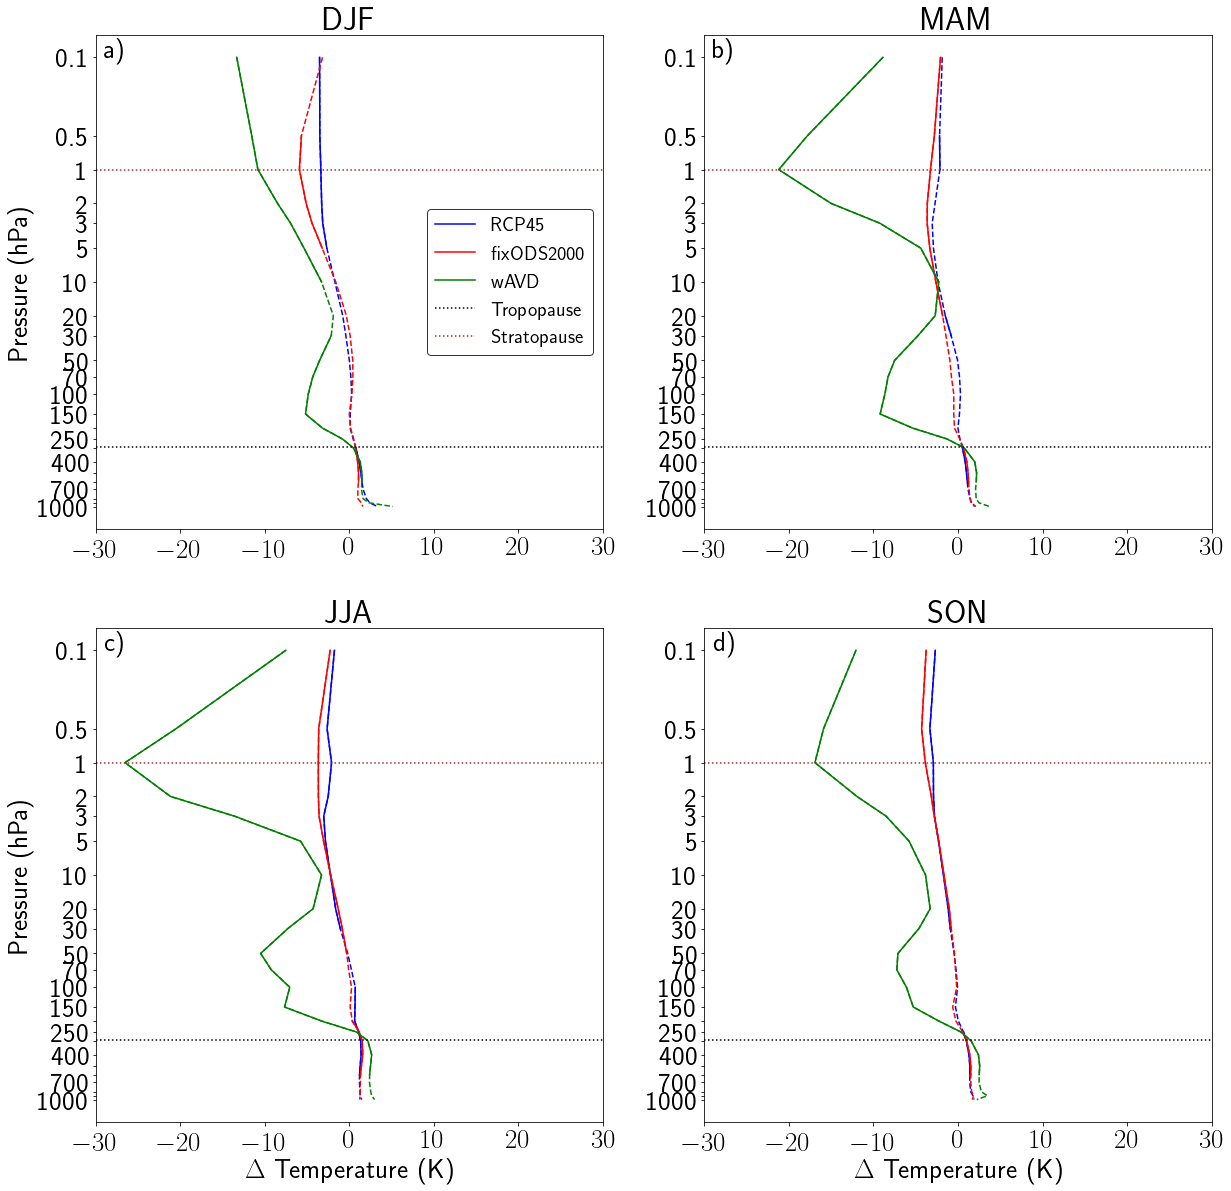

In [49]:
plt.figure(figsize=(20,20))


plt.subplot(2,2,1)
plt.title('DJF')
plt.plot(RCP45_DJF_Sig,Pressure_L, color = 'b', label='RCP45')
plt.plot(RCP45_DJF_DD_AA,Pressure_L, color = 'b',linestyle='--')
plt.plot(fixODS2000_DJF_Sig,Pressure_L, color = 'r', label='fixODS2000')
plt.plot(fixODS2000_DJF_DD_AA,Pressure_L, color = 'r',linestyle='--')
plt.plot(wAVD_DJF_Sig,Pressure_L, color = 'g', label='wAVD')
plt.plot(wAVD_DJF_DD_AA,Pressure_L, color = 'g',linestyle='--')
plt.xlim(-30,30)
#plt.xlabel('$\Delta$ Temperature (K)')
plt.ylabel('Pressure (hPa)')
plt.yticks(Pressure_L,Pressure_named)
plt.axhline(2.47, color = 'k', linestyle = ':', label = 'Tropopause')
plt.axhline(0, color = 'brown', linestyle = ':', label = 'Stratopause')
plt.legend().get_frame().set_linewidth(4)
plt.legend(fontsize=20).get_frame().set_edgecolor('k')
plt.gca().invert_yaxis()
plt.text(-29,-1,'a)',fontsize=27)

plt.subplot(2,2,2)
plt.title('MAM')
plt.plot(RCP45_MAM_Sig,Pressure_L, color = 'b', label='RCP45')
plt.plot(RCP45_MAM_DD_AA,Pressure_L, color = 'b',linestyle='--')
plt.plot(fixODS2000_MAM_Sig,Pressure_L, color = 'r', label='fixODS2000')
plt.plot(fixODS2000_MAM_DD_AA,Pressure_L, color = 'r',linestyle='--')
plt.plot(wAVD_MAM_Sig,Pressure_L, color = 'g', label='wAVD')
plt.plot(wAVD_MAM_DD_AA,Pressure_L, color = 'g',linestyle='--')
plt.xlim(-30,30)
#plt.xlabel('$\Delta$ Temperature (K)')
#plt.ylabel('Pressure (hPa)')
plt.yticks(Pressure_L,Pressure_named)
plt.axhline(2.47, color = 'k', linestyle = ':', label = 'Tropopause')
plt.axhline(0, color = 'brown', linestyle = ':', label = 'Stratopause')
#plt.legend()
plt.gca().invert_yaxis()
plt.text(-29,-1,'b)',fontsize=27)

plt.subplot(2,2,3)
plt.title('JJA')
plt.plot(RCP45_JJA_Sig,Pressure_L, color = 'b', label='RCP45')
plt.plot(RCP45_JJA_DD_AA,Pressure_L, color = 'b',linestyle='--')
plt.plot(fixODS2000_JJA_Sig,Pressure_L, color = 'r', label='fixODS2000')
plt.plot(fixODS2000_JJA_DD_AA,Pressure_L, color = 'r',linestyle='--')
plt.plot(wAVD_JJA_Sig,Pressure_L, color = 'g', label='wAVD')
plt.plot(wAVD_JJA_DD_AA,Pressure_L, color = 'g',linestyle='--')
plt.xlim(-30,30)
plt.xlabel('$\Delta$ Temperature (K)')
plt.ylabel('Pressure (hPa)')
plt.yticks(Pressure_L,Pressure_named)
plt.axhline(2.47, color = 'k', linestyle = ':', label = 'Tropopause')
plt.axhline(0, color = 'brown', linestyle = ':', label = 'Stratopause')
#plt.legend()
plt.gca().invert_yaxis()
plt.text(-29,-1,'c)',fontsize=27)

plt.subplot(2,2,4)
plt.title('SON')
plt.plot(RCP45_SON_Sig,Pressure_L, color = 'b', label='RCP45')
plt.plot(RCP45_SON_DD_AA,Pressure_L, color = 'b',linestyle='--')
plt.plot(fixODS2000_SON_Sig,Pressure_L, color = 'r', label='fixODS2000')
plt.plot(fixODS2000_SON_DD_AA,Pressure_L, color = 'r',linestyle='--')
plt.plot(wAVD_SON_Sig,Pressure_L, color = 'g', label='wAVD')
plt.plot(wAVD_SON_DD_AA,Pressure_L, color = 'g',linestyle='--')
plt.xlim(-30,30)
plt.xlabel('$\Delta$ Temperature (K)')
#plt.ylabel('Pressure (hPa)')
plt.yticks(Pressure_L,Pressure_named)
plt.axhline(2.47, color = 'k', linestyle = ':', label = 'Tropopause')
plt.axhline(0, color = 'brown', linestyle = ':', label = 'Stratopause')
#plt.legend()
plt.gca().invert_yaxis()
plt.text(-29,-1,'d)',fontsize=27)

plt.savefig('Decadal Difference in Seasonal Temperature Profiles.png', bbox_inches='tight')

## Maximum and Minimum Statistically significant differences for each temperature profile

In [42]:
print("The max difference in temperature for RCP45 in DJF is:",np.amax(RCP45_DJF_Sig))
print("The max difference in temperature for fixODS2000 in DJF is:",np.amax(fixODS2000_DJF_Sig))
print("The max difference in temperature for wAVD in DJF is:",np.amax(wAVD_DJF_Sig))

print("The min difference in temperature for RCP45 in DJF is:",np.amin(RCP45_DJF_Sig))
print("The min difference in temperature for fixODS2000 in DJF is:",np.amin(fixODS2000_DJF_Sig))
print("The min difference in temperature for wAVD in DJF is:",np.amin(wAVD_DJF_Sig))

The max difference in temperature for RCP45 in DJF is: 1.5109260538848142
The max difference in temperature for fixODS2000 in DJF is: 1.0963889036837917
The max difference in temperature for wAVD in DJF is: 2.3077448584562954
The min difference in temperature for RCP45 in DJF is: -3.513251008613373
The min difference in temperature for fixODS2000 in DJF is: -5.898567572596641
The min difference in temperature for wAVD in DJF is: -13.313798651492114


In [43]:
print("The max difference in temperature for RCP45 in MAM is:",np.amax(RCP45_MAM_Sig))
print("The max difference in temperature for fixODS2000 in MAM is:",np.amax(fixODS2000_MAM_Sig))
print("The max difference in temperature for wAVD in MAM is:",np.amax(wAVD_MAM_Sig))

print("The min difference in temperature for RCP45 in MAM is:",np.amin(RCP45_MAM_Sig))
print("The min difference in temperature for fixODS2000 in MAM is:",np.amin(fixODS2000_MAM_Sig))
print("The min difference in temperature for wAVD in MAM is:",np.amin(wAVD_MAM_Sig))

The max difference in temperature for RCP45 in MAM is: 1.0941459227936785
The max difference in temperature for fixODS2000 in MAM is: 1.2565350247300595
The max difference in temperature for wAVD in MAM is: 2.199101379695202
The min difference in temperature for RCP45 in MAM is: -2.1818072176580814
The min difference in temperature for fixODS2000 in MAM is: -3.649788828986017
The min difference in temperature for wAVD in MAM is: -21.19991422330463


In [44]:
print("The max difference in temperature for RCP45 in JJA is:",np.amax(RCP45_JJA_Sig))
print("The max difference in temperature for fixODS2000 in JJA is:",np.amax(fixODS2000_JJA_Sig))
print("The max difference in temperature for wAVD in JJA is:",np.amax(wAVD_JJA_Sig))

print("The min difference in temperature for RCP45 in JJA is:",np.amin(RCP45_JJA_Sig))
print("The min difference in temperature for fixODS2000 in JJA is:",np.amin(fixODS2000_JJA_Sig))
print("The min difference in temperature for wAVD in JJA is:",np.amin(wAVD_JJA_Sig))

The max difference in temperature for RCP45 in JJA is: 1.3959839188931642
The max difference in temperature for fixODS2000 in JJA is: 1.593542363129691
The max difference in temperature for wAVD in JJA is: 2.6479424771305338
The min difference in temperature for RCP45 in JJA is: -3.0244994396930776
The min difference in temperature for fixODS2000 in JJA is: -3.664301391146324
The min difference in temperature for wAVD in JJA is: -26.52525386943904


In [45]:
print("The max difference in temperature for RCP45 in SON is:",np.amax(RCP45_SON_Sig))
print("The max difference in temperature for fixODS2000 in SON is:",np.amax(fixODS2000_SON_Sig))
print("The max difference in temperature for wAVD in SON is:",np.amax(wAVD_SON_Sig))

print("The min difference in temperature for RCP45 in SON is:",np.amin(RCP45_SON_Sig))
print("The min difference in temperature for fixODS2000 in SON is:",np.amin(fixODS2000_SON_Sig))
print("The min difference in temperature for wAVD in SON is:",np.amin(wAVD_SON_Sig))

The max difference in temperature for RCP45 in SON is: 1.400025124552204
The max difference in temperature for fixODS2000 in SON is: 1.5151526034769767
The max difference in temperature for wAVD in SON is: 2.5649425832626562
The min difference in temperature for RCP45 in SON is: -3.3238440112325005
The min difference in temperature for fixODS2000 in SON is: -4.303743295883425
The min difference in temperature for wAVD in SON is: -16.925410301771002


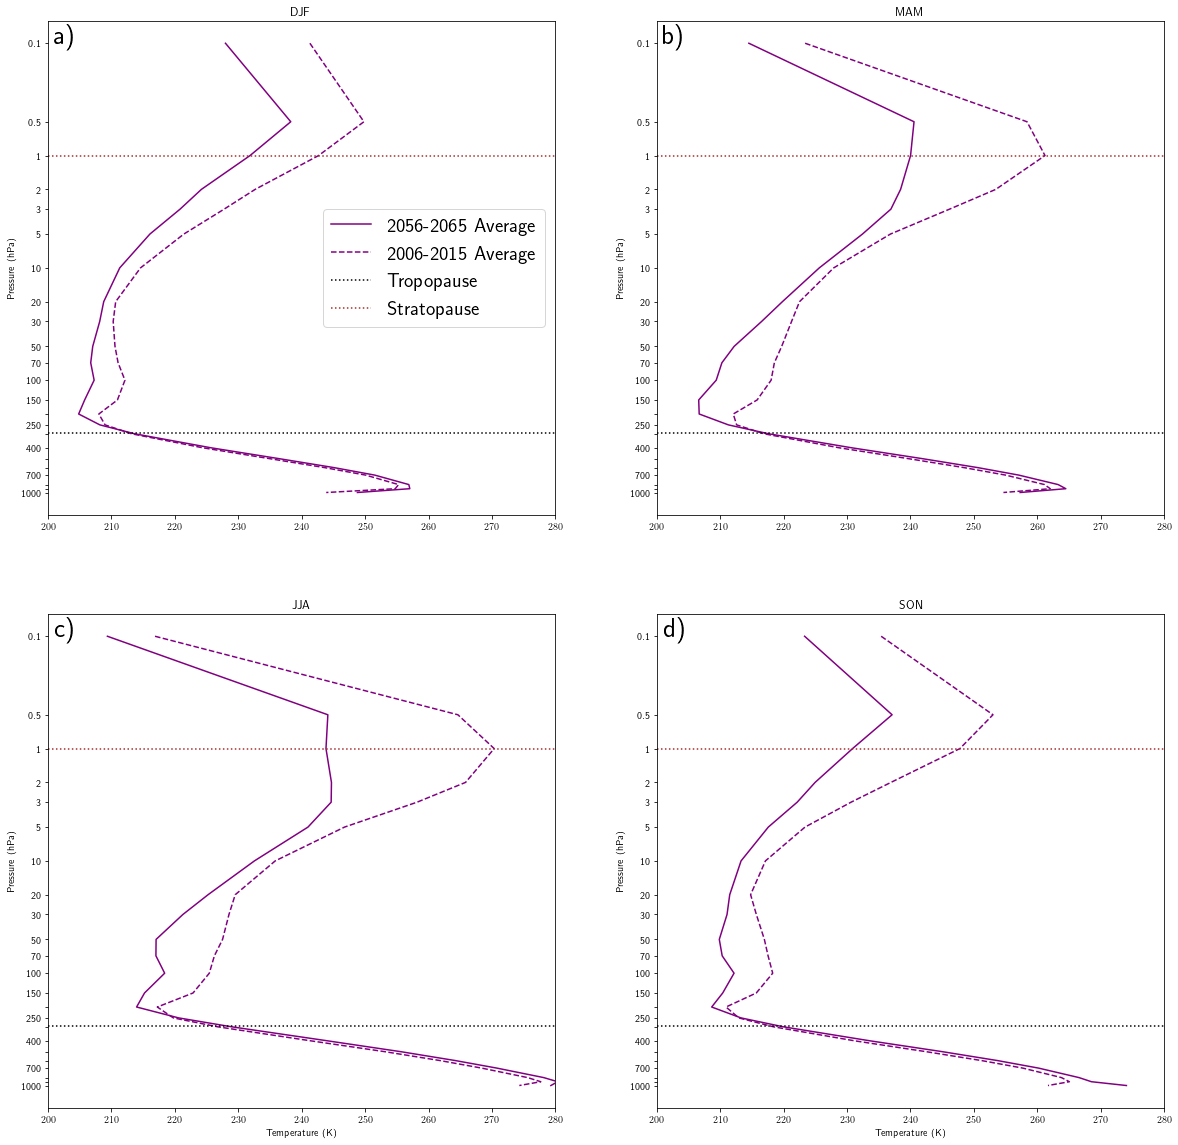

In [46]:
plt.figure(figsize=(20,20))


plt.subplot(2,2,1)
plt.title('DJF')
#plt.plot(RCP45_DJF_2D_AA,Pressure_L, color = 'b', label='RCP45')
#plt.plot(RCP45_DJF_1D_AA,Pressure_L, color = 'b',linestyle='--')
#plt.plot(fixODS2000_DJF_2D_AA,Pressure_L, color = 'r', label='fixODS2000')
#plt.plot(fixODS2000_DJF_1D_AA,Pressure_L, color = 'r',linestyle='--')
plt.plot(wAVD_DJF_2D_AA,Pressure_L, color = 'purple', label='2056-2065 Average')
plt.plot(wAVD_DJF_1D_AA,Pressure_L, color = 'purple',linestyle='--', label='2006-2015 Average')
plt.xlim(200,280)
#plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (hPa)')
plt.yticks(Pressure_L,Pressure_named)
plt.axhline(2.47, color = 'k', linestyle = ':', label='Tropopause')
plt.axhline(0, color = 'brown', linestyle = ':', label = 'Stratopause')
plt.legend(fontsize=20)
plt.gca().invert_yaxis()
plt.text(201,-1,'a)',fontsize=27)

plt.subplot(2,2,2)
plt.title('MAM')
#plt.plot(RCP45_MAM_2D_AA,Pressure_L, color = 'b', label='RCP45')
#plt.plot(RCP45_MAM_1D_AA,Pressure_L, color = 'b',linestyle='--')
#plt.plot(fixODS2000_MAM_2D_AA,Pressure_L, color = 'r', label='fixODS2000')
#plt.plot(fixODS2000_MAM_1D_AA,Pressure_L, color = 'r',linestyle='--')
plt.plot(wAVD_MAM_2D_AA,Pressure_L, color = 'purple', label='2056-2065 Average')
plt.plot(wAVD_MAM_1D_AA,Pressure_L, color = 'purple',linestyle='--', label='2006-2015 Average')
plt.xlim(200,280)
#plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (hPa)')
plt.yticks(Pressure_L,Pressure_named)
plt.axhline(2.47, color = 'k', linestyle = ':', label = 'Tropopause')
plt.axhline(0, color = 'brown', linestyle = ':', label = 'Stratopause')
#plt.legend()
plt.gca().invert_yaxis()
plt.text(201,-1,'b)',fontsize=27)

plt.subplot(2,2,3)
plt.title('JJA')
#plt.plot(RCP45_JJA_2D_AA,Pressure_L, color = 'b', label='RCP45')
#plt.plot(RCP45_JJA_1D_AA,Pressure_L, color = 'b',linestyle='--')
#plt.plot(fixODS2000_JJA_2D_AA,Pressure_L, color = 'r', label='fixODS2000')
#plt.plot(fixODS2000_JJA_1D_AA,Pressure_L, color = 'r',linestyle='--')
plt.plot(wAVD_JJA_2D_AA,Pressure_L, color = 'purple', label='2056-2065 Average')
plt.plot(wAVD_JJA_1D_AA,Pressure_L, color = 'purple',linestyle='--', label='2006-2015 Average')
plt.xlim(200,280)
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (hPa)')
plt.yticks(Pressure_L,Pressure_named)
plt.axhline(2.47, color = 'k', linestyle = ':', label = 'Tropopause')
plt.axhline(0, color = 'brown', linestyle = ':', label = 'Stratopause')
#plt.legend()
plt.gca().invert_yaxis()
plt.text(201,-1,'c)',fontsize=27)

plt.subplot(2,2,4)
plt.title('SON')
#plt.plot(RCP45_SON_2D_AA,Pressure_L, color = 'b', label='RCP45')
#plt.plot(RCP45_SON_1D_AA,Pressure_L, color = 'b',linestyle='--')
#plt.plot(fixODS2000_SON_2D_AA,Pressure_L, color = 'r', label='fixODS2000')
#plt.plot(fixODS2000_SON_1D_AA,Pressure_L, color = 'r',linestyle='--')
plt.plot(wAVD_SON_2D_AA,Pressure_L, color = 'purple', label='2056-2065 Average')
plt.plot(wAVD_SON_1D_AA,Pressure_L, color = 'purple',linestyle='--', label='2006-2015 Average')
plt.xlim(200,280)
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (hPa)')
plt.yticks(Pressure_L,Pressure_named)
plt.axhline(2.47, color = 'k', linestyle = ':', label = 'Tropopause')
plt.axhline(0, color = 'brown', linestyle = ':', label = 'Stratopause')
#plt.legend()
plt.gca().invert_yaxis()
plt.text(201,-1,'d)',fontsize=27)

plt.savefig('Side By Side Comparison of wAVD latter and former Decade Temp Profiles.png', bbox_inches='tight')